# Quantitative Research Task

The purpose of this test is to give you a feel for the analysis of financial time series, and for us assess your ability in programming, machine learning, and statistical modelling.

## 1. Data Processing

The provided data set contains ASX stock prices from Jan 2015 to June 2018. Each csv file contains end of day (EOD) data in the following format: Ticker, Date, Open, High, Low, Close, and Volume.

The first task is converting the EOD data into five seperate time series data frames; one each for Open, High, Low Close and Volume. In each data frame, rows should be indexed by date, and columns by ticker.

First, let's read the data from all the text files.

In [80]:
import glob
import pandas as pd

# get list of file names from directory
directory = "./ASX-2015-2018/ASX-2015-2018/"
files = glob.glob(directory + '[0-9]*.txt')

# generate list of dataframes from each file (or date) respectively
cl_name = ["ticker", "date", "open", "high", "low", "close", "volume"]
dfs = [pd.read_csv(file, 
                   sep=",", 
                   names = cl_name, 
                   header = None, 
                   parse_dates = ["date"], 
                   index_col = "date") 
       for file in files]

# concatenate the dataframes into one temporary dataframe
df_master = pd.concat(dfs)

Let us first understand how many tickers and observations (days) are there in total based on the concatenated dataframe `df_master`.

In [81]:
# number of tickers in dataframe
print("There are {} tickers with obervations over {} days.".format(df_master.ticker.unique().size, df_master.index.unique().size))

There are 2773 tickers with obervations over 883 days.


Now, let's build dataframe for open, high, low, close, and volume as desired

In [82]:
# using pivot function, for each ticker values, individual dataframes for open, high, low, close, and volume can be built
df_open = df_master[["ticker", "open"]].pivot(columns = "ticker", values = "open")
df_high = df_master[["ticker", "high"]].pivot(columns = "ticker", values = "high")
df_low = df_master[["ticker", "low"]].pivot(columns = "ticker", values = "low")
df_close = df_master[["ticker", "close"]].pivot(columns = "ticker", values = "close")
df_volume = df_master[["ticker", "volume"]].pivot(columns = "ticker", values = "volume")

Below is the close price dataframe (head) for reference.

In [83]:
df_close.head()

ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.215,NaN,NaN,NaN,2.26,NaN,NaN,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.265,NaN,NaN,NaN,2.07,NaN,NaN,...,NaN,NaN,4.40,NaN,0.070,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.245,NaN,NaN,NaN,2.08,NaN,NaN,...,NaN,NaN,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.250,NaN,NaN,NaN,2.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.255,NaN,NaN,NaN,2.08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we create a dataframe containing the future close returns at time $t$, denoted as $r_{t,t+1}$, as defined by:

$$r_{t,t+1}=\frac{P^{c}_{t+1}}{P^{c}_{t}}-1,$$

where $P^c_t$ is the close price at time $t$. This will be the quantity-of-interest that will be predicted.

In [84]:
from pandas.tseries.offsets import BDay

# to find the future close return of t+1, or the close return of next business day, and assign to the index of t
df_ftr_rtn = (df_close.shift(-1) / df_close) - 1
df_ftr_rtn.head()

ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,0.041152,NaN,NaN,NaN,-0.084071,NaN,NaN,...,NaN,NaN,NaN,NaN,0.044776,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,-0.015810,NaN,NaN,NaN,0.004831,NaN,NaN,...,NaN,NaN,-0.002273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,0.004016,NaN,NaN,NaN,-0.014423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,0.004000,NaN,NaN,NaN,0.014634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,0.015936,NaN,NaN,NaN,0.096154,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also create a data frame containing close returns for the day, which is calculated with respect to the close price of the previous day.

In [85]:
# to find the future close return of t based on t-1 close values and assign to the index of t
df_rtn = (df_close / df_close.shift(1)) - 1
df_rtn.head()

ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,0.041152,NaN,NaN,NaN,-0.084071,NaN,NaN,...,NaN,NaN,NaN,NaN,0.044776,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,-0.015810,NaN,NaN,NaN,0.004831,NaN,NaN,...,NaN,NaN,-0.002273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,0.004016,NaN,NaN,NaN,-0.014423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,0.004000,NaN,NaN,NaN,0.014634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a data frame containing the ratios of $\frac{High}{Low}$ for each ticker each day, in the same format.

In [86]:
# dataframe wirh ratio of high/low for each ticker on each day
df_hl = df_high / df_low
df_hl.head()

ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.068966,NaN,NaN,NaN,1.055300,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.061224,NaN,NaN,NaN,1.111111,NaN,NaN,...,NaN,NaN,1.022727,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.041322,NaN,NaN,NaN,1.039604,NaN,NaN,...,NaN,NaN,1.006865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.041667,NaN,NaN,NaN,1.050000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.044534,NaN,NaN,NaN,1.014493,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Exploratory Data Analysis

### 2.1 Hypothesis, Motivation, Approach and Strategy

As of 22 November 2019, based on ASX's website, there are in total 2195 unique tickers currently listed. The dataset however has 2773 unique tickers; which means that it has tickers of companies that have been delisted.

Before analysing the coverage and quality, let us discuss the motivation and strategy of this project. This will also help defining the scope of this document.

**Hypothesis**: 
1. Based on research [1-6], the patterns in the technical indicators derived from open, high, low, close, and volume (OHLCV) of a particular stock (or company) have the predictive power of its future movements.
2. Additionally, the tehnical indicators of companies contributing to compound indexes, such as ASX All Ordinaries, S&P/ASX 50, etc. can be used to predict the movement of the compund indexes that they belong to.

**Scope**:
This work limits its scope to hypothesis 1 above due to time constaint.

**Motivation**:
This work extends hypothesis 1 to be more generic as follows: unlike the hypotheses employed in [1-6], the future movement of any stock price can be predicted through the movement and pattern of its technical indicators; and the same prediction from movement and pattern can be applicable to stock price of any company.

Based on studies [1-6], the time series nature of the data recommends the use of long short-term memory paradigm of neural network, which has been shown to be superior to ensemble methods such as random forest and other classification techniques such as the support vector machines.

**Strategy**:
The strategy here is to build a generic prediction model using the OHLCV data and technical indicators of past 60 (trading) days so as to be able to predict the movement of any stock price. Note that this excludes all compund indexes listed in ASX (as this falls under hypothesis 2).

For this, an LSTM model will be trained using train, validation, and test data to obtain the following metrics: (1) UP or DOWN movement of the next day stock price; and (2) prediction probability.

### 2.2. Coverage and Quality

As it can be observed from the dataframe printed out in the previous section, not all the tickers have complete data. There are 2773 unique tickers and 883 obervations. Now let us first visualise the distribution of number of non-missing values using dataframe `df_close`.

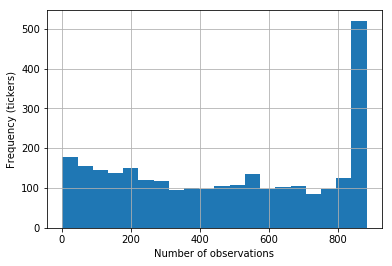

There are 196 tickers with full data available.


In [87]:
import matplotlib.pyplot as plt

# histogram of the number of non-missing values
ax = df_close.notna().sum().hist(bins=20)
plt.xlabel("Number of observations")
plt.ylabel("Frequency (tickers)")
plt.axis("tight")
plt.show()

print("There are {} tickers with full data available.".format(df_close.columns[(df_close.notna().sum() == df_close.shape[0]).values].shape[0])) 

The histogram above shows that there are about 196 tickers with no missing values in close price. For peace of mind, let us inspect if the `df_master` dataframe is clean.

In [88]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1319997 entries, 2015-01-02 to 2018-06-29
Data columns (total 6 columns):
ticker    1319997 non-null object
open      1319997 non-null float64
high      1319997 non-null float64
low       1319997 non-null float64
close     1319997 non-null float64
volume    1319997 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 70.5+ MB


The result above shows that the master dataframe is indeed clean. This means that all missing values in `df_close` is coming from the price not being registered on the day. After crosschecking with data from the ASX's official website, this is mainly due to the fact that the trade did not take place on that day, company listed after 2015-01-02, or company delisted before 2018-06-29. 

As clean result is of paramount importance, let us disregard the tickers with missing values and take only the ones with full data from 2015-01-02 to 2018-06-29. The model that will be built can still be used by the tickers with missing values as only the 60 consequtive trading days is of concern for prediction.

That being said, there area few ways where the missing values can be handled on the day where the trade did not take place:
1. Volume set to 0 and open, high, low, and close values set to previous day's close value with the assumption that no trade occured on that day for that particular ticker. This approach may introduce outliers in the volume and therefore noise in the data.
2. Interpolate the data OHLCV data using the previous and next available values for smooth transition. Another alternative is to fill in the missing values to be either the mean and median of the column. This, on the other hand, introduces false information and could influence the machine learning model if the number of missing values is large enough.

Let us now filter the dataframes for tickers with full information.

In [89]:
# get the array of tickers with less than 5% missing values
tickers_good = df_close.columns[(df_close.notna().sum() == 883).values]

# filter the dataframes
df_open = df_open[tickers_good] # open
df_high = df_high[tickers_good] # high
df_low = df_low[tickers_good] # low
df_close = df_close[tickers_good] # close
df_volume = df_volume[tickers_good] # volume
df_ftr_rtn = df_ftr_rtn[tickers_good] # future return
df_rtn = df_rtn[tickers_good] # return
df_hl = df_hl[tickers_good] # high/low

As mentioned earlier, we are also not interested in the composite indexes as they do not fall within the scope of the approach taken. Therefore, let us remove those tickers as well. After checking with ASX's website, they are the tickers that do not have volume information.

In [90]:
# Find composite indexes. They can be identified by 0 volume.
non_comp_indexes = df_volume.columns[(df_volume.sum() != 0).values].values

df_open = df_open[non_comp_indexes] # open
df_high = df_high[non_comp_indexes] # high
df_low = df_low[non_comp_indexes] # low
df_close = df_close[non_comp_indexes] # close
df_volume = df_volume[non_comp_indexes] # volume
df_ftr_rtn = df_ftr_rtn[non_comp_indexes] # future return
df_rtn = df_rtn[non_comp_indexes] # return
df_hl = df_hl[non_comp_indexes] # high/low

### 2.2. Additional Transformations

Before going into performing some visualisations and analysis, let us look at some technical indicators for feature engineering. In essence, we would want to engineer features such that they possess some level of predictive power that could indicate the future direction of the market. Statistically speaking, these features should generally have good correlation to the market movement.

There are numerous such transformations in literature [1-5]. The work by Borovkova et al. [1] consolidates some of the key technical indicators which can be used for additional transformations. Typically, they can be categorised into four groups: (1) Momentum; (2) Trend; (3) Volume; and (4) Volatility. Some of the commonly used indicators are:

    1. Momentum:
        a. Money flow index 
        b. Relative strength index
        c. Stochastic oscillator (%K)
        d. Stochastic oscillator (%D)
        e. William %R
        f. Rate of change
    2. Trend:
        a. Exponential moving average
        b. Moving average convergence-divergence
        c. Commodity channel index
        d. Ichimoku Indicator
    3. Volume:
        a. Accumulation/distribution index
    4. Volatility:
        a. Bollinger bands 
    
Now, let us perform additional transformations. To keep this document succinct, the definition of these indicators-of-interest will be described, whereas information of the other indicators can be obtained from [1, 2]. All tranformations will be employing the open-source Python package [6].

#### 2.2.1. Money flow index (MFI)

Money flow index is calculated based on the price and volume to indicate the strength of money in and out from a particular ticker, or in other words, if a particular stock is overbought or oversold. Typically, when MFI of above 80 indicates overbought and oversold when it is below 20.

The MFI can be calculated as follows:

$$\text{MFI} = 100 - \frac{100}{1+\text{MFR}}$$
where
$$\text{MFR} = \frac{\text{Positive Money Flow}}{\text{Negative Money Flow}}$$

$$\text{Money Flow} = \left(\frac{\text{High} + \text{Low} + \text{Close}}{3}\right)\text{Volume}$$

and MFR denotes money flow ratio.

In [91]:
import ta # import package

# mfi dataframe
df_mfi = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate mfi
    temp = ta.momentum.money_flow_index(high=df_high[ticker], 
                                      low=df_low[ticker], 
                                      close=df_close[ticker], 
                                      volume=df_volume[ticker])
    # concatenate with main dataframe
    df_mfi = pd.concat([df_mfi, temp], axis=1)

# rename the columns
df_mfi.columns = df_close.columns

#### 2.2.2. Exponential moving average (EMA)

The exponential moving average is exponentially weighed moving average calculated by exponentially decreasing the weight of observations $x_i$ with respect to their distance from $x_t$ using weighted multiplier $\alpha$. For example, $\alpha = 0.1$ gets only 10% of the current value into EMA. Since only a small portion of the current value is taken, most of the old values are preserved. Essentially, EMA is defined as:

$$\text{EMA}(x_t, \alpha) = \alpha x_t + (1 − \alpha) \text{EMA}(x_{t−1}, \alpha).$$

and

$$\alpha = \frac{2}{N+1}$$

where $N$ is number of days in a period. In this study, let us use $N = 10$ to be consistent with MFI, and hence $\alpha = 0.13333$ using the close price of day $t$ as $x_t$.

In [92]:
# ema dataframe
df_ema = df_close.apply(ta.trend.ema_indicator)

#### 2.2.3. Relative strength index (RSI)

Just like the MFI, the relative strength index is another momentum indicator, but uses the velocity and magnitude of price momevents and also to indicate whether a stock is overbought or oversold. The RSI can be simply calculated as follows:

$$\text{RSI} = 100 - \frac{100}{1+\text{RS}}$$

where

$$\text{RS} = \frac{\text{Average of up closes}}{\text{Average of down closes}}$$

is the relative strength. For consistency, let us use $N = 10$ when calculating the average.

In [93]:
# ema dataframe
df_rsi = df_close.apply(ta.momentum.rsi)

#### 2.2.4. Stochastic oscillator (SO)

The stochastic oscillator (or Stochastic %K) is a momentum indicator calculated using the highest high price over a period of time $N$, lowest low price over a period of time $N$, and the current close price. The calculation can be simply performed as:

$$\text{%K} = \left(\frac{\text{Close} - \text{Lowest Low}}{\text{Highest High} - \text{Lowest Low}} \right)*100$$

which gives the result in percentage.

The fast stochastic indicator (Stochastic %D) is normally the 3-period moving average of %K. Both indicators will be calculated below.

In [94]:
# stoch_k and stoch_d dataframe
df_stoch_k = pd.DataFrame()
df_stoch_d = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate %k
    temp = ta.momentum.stoch(high=df_high[ticker],
                             low=df_low[ticker],
                             close=df_close[ticker])
    # concatenate with main dataframe
    df_stoch_k = pd.concat([df_stoch_k, temp], axis=1)
    
    # calculate %d
    temp = ta.momentum.stoch_signal(high=df_high[ticker],
                             low=df_low[ticker],
                             close=df_close[ticker])
    # concatenate with main dataframe
    df_stoch_d = pd.concat([df_stoch_d, temp], axis=1)

# rename the columns
df_stoch_k.columns = df_close.columns
df_stoch_d.columns = df_close.columns

#### 2.2.5. Moving average convergence-divergence (MACD)

The moving average convergence-divergence is an indicator that shows the relationship between 12-period EMA and 26-period EMA. This index can be used to measure the trend-following momentum of a security. Accordingly, it is calculated as:

$$\text{MACD} = \text{12-Period EMA} - \text{26-Period EMA}$$

where EMA is the exponential moving average, as defined and programmed earlier.

In [95]:
# macd dataframe
df_macd = df_close.apply(ta.trend.macd_diff, fillna=True)

#### 2.2.6. William %R

William's %R is another momentum indicator that ranges between -100 and 0 which shows the overbought and oversold of a stock price. For example, a reading above -20 is overbought and a reading below -80 is oversold. Typically, it is calculated over the period of last $N=14$ days.

This indicator can be simply calculated as follows:

$$\text{%R} = \frac{\text{Highest High} - \text{Close}}{\text{Highest High} - \text{Lowest Low}}$$

In [96]:
# william_r dataframe
df_will_r = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate william_r
    temp = ta.momentum.wr(high=df_high[ticker],
                          low=df_low[ticker],
                          close=df_close[ticker])
    # concatenate with main dataframe
    df_will_r = pd.concat([df_will_r, temp], axis=1)

# rename the columns
df_will_r.columns = df_close.columns

#### 2.2.7. Commodity Channel Index

The commodity channel index is another trend indicator, but the difference in this indicator is that it measures the difference between the current price and the historical average price. This indicator can be calculated as follows:

$$\text{CCI}=\frac{1}{0.015}\frac{\text{Typical Price}-\text{SMA}\left( \text{Typical Price}\right)}{\text{MD}\left( \text{Typical Price}\right)}$$

where $\text{SMA}$ is the simple moving average and $\text{MD}$ is the mead absolute deviation.

When the CCI is above zero it indicates the price is above the historic average. When CCI is below zero, the price is below the historic average. Readings above 100 typically signals buy signal; and sell signal for reading below -100.

In [97]:
# cci dataframe
df_cci = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate cci
    temp = ta.trend.cci(high=df_high[ticker],
                        low=df_low[ticker],
                        close=df_close[ticker])
    # concatenate with main dataframe
    df_cci = pd.concat([df_cci, temp], axis=1)

# rename the columns
df_cci.columns = df_close.columns

#### 2.2.8. Ichimoku Indicator

The Ichimoku Cloud is a collection of technical indicators that show support and resistance levels, as well as momentum and trend direction. To keep the indicators simple, only the two important indicators from Ichimoku Cloud are used: leading spans A and B. More information on the Ichimoku indicator can be found in [6].

In [98]:
# ichi_a and ichi_b dataframe
df_ichi_a = pd.DataFrame()
df_ichi_b = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate ichi_a
    temp = ta.trend.ichimoku_a(high=df_high[ticker],
                               low=df_low[ticker])
    # concatenate with main dataframe
    df_ichi_a = pd.concat([df_ichi_a, temp], axis=1)
    
    # calculate ichi_b
    temp = ta.trend.ichimoku_b(high=df_high[ticker],
                               low=df_low[ticker])
    # concatenate with main dataframe
    df_ichi_b = pd.concat([df_ichi_b, temp], axis=1)

# rename the columns
df_ichi_a.columns = df_close.columns
df_ichi_b.columns = df_close.columns

#### 2.2.9. Accumulation/Distribution Index

Accumulation/distribution is a cummulative indicator that makes use of volume and price to determine if the stock is being accummulated of distributed. Typically, a rising A/D line helps confirm a rising price trend whereas a falling A/D line helps confirm a price downtrend.

$$\text{A/D} = \text{Previous A/D} + { (\text{Close} - \text{Low}) - (\text{High} - \text{Close}) \over \text{High} - \text{Low} }*\text{Volume}$$

In [99]:
# A/D dataframe
df_ad = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate cci
    temp = ta.volume.acc_dist_index(high=df_high[ticker],
                                    low=df_low[ticker],
                                    close=df_close[ticker],
                                    volume=df_volume[ticker]
                                   )
    # concatenate with main dataframe
    df_ad = pd.concat([df_ad, temp], axis=1)

# rename the columns
df_ad.columns = df_close.columns

#### 2.2.10. Bollinger Bands

Bollinger bands are two lines that are two standard deviations away from the EMA. It is a volatility indicator. Here, it will be presented in terms of percentage as:

$$\text{BB} = \frac{\text{Close}-\text{Lower Band}}{\text{Higher Band} - \text{Lower Band}}$$

Typically, value of above 0.8 gives sell signal; and buy signal for value below 0.2.

In [100]:
# Calculate upper and lower band
df_bb_up = df_close.apply(ta.volatility.bollinger_hband)
df_bb_down = df_close.apply(ta.volatility.bollinger_lband)
    
# Calculate percentage and return and store as bbp
df_bbp = (df_close - df_bb_down) / (df_bb_up - df_bb_down)

### 2.3. Data Analysis

In [101]:
# list all the dataframes of interest
dfois = [df_open, df_high, df_low, df_close,df_volume, df_rtn, df_hl,
         df_mfi, df_ema, df_rsi, df_stoch_k, df_stoch_d, df_macd, df_will_r, df_cci,
         df_ichi_a, df_ichi_b, df_ad, df_bbp, df_bb_up, df_bb_down, df_ftr_rtn]
dfois_str = ['open', 'high', 'low', 'close', 'volume', 'rtn', 'hl','mfi', 'ema', 'rsi', 'stoch_k', 'stoch_d', 'macd', 
             'will_r', 'cci', 'ichi_a', 'ichi_b', 'ad', 'bbp', 'bb_up', 'bb_down', 'ftr_rtn']

# remove dates prior to 2015-02-01
[df.drop(df.iloc[df.index < '2015-02-01'].index, inplace=True) for df in dfois];
[df.drop(df.iloc[df.index == '2018-06-29'].index, inplace=True) for df in dfois];

Let us find the correlation between all the dataframes, or in other words, between features. Because we have numerous tickers in a dataframe, it could be difficult to visualise the correlation matrix for all tickers. Therefore, here, we take the average correlation value and visualise the correlations using a heatmap.

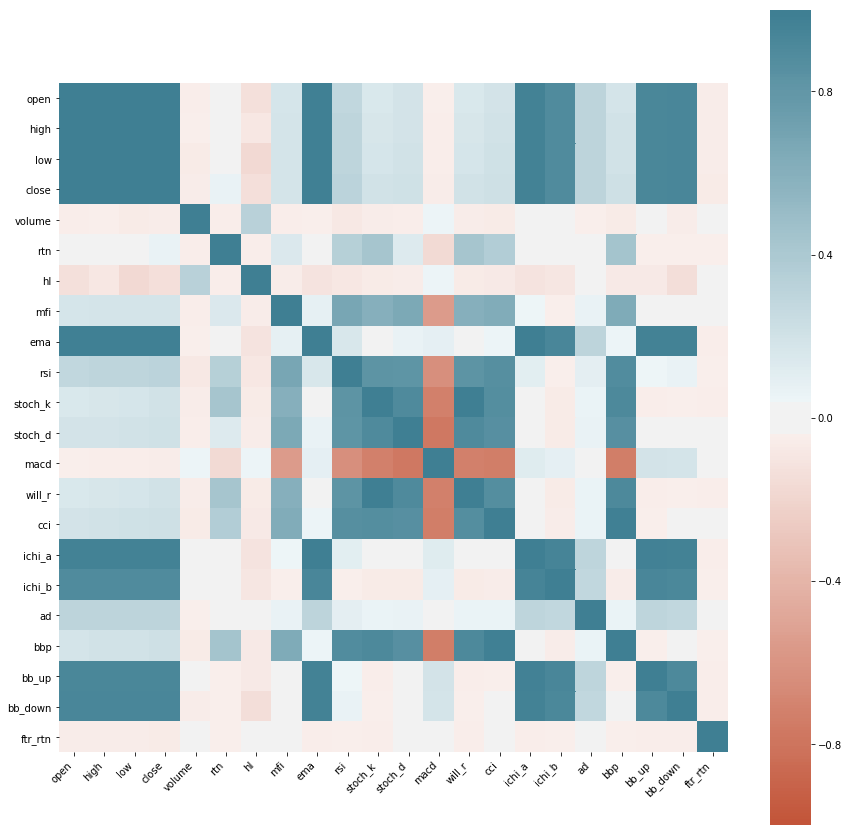

In [102]:
import numpy as np
import seaborn as sns

# initialise numpy array
corr_val = np.empty([len(dfois),len(dfois)])

# loop over every dataframe and find correlation
for i, df1 in enumerate(dfois):
    for j, df2 in enumerate(dfois):
        corr_val[i][j] = df1.corrwith(df2).mean()
    
# visualise the correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(15,15))
df_corr = pd.DataFrame(corr_val, columns=dfois_str, index=dfois_str)

sns.heatmap(
    df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=500),
    square=True,
    ax=ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In additian to the correlation matrix heatmap, let us also have a look at the histogram of data to look for outliers. Before we do that, we need to normalise the data from 0 to 1 for every ticker so that they can be visualised appropriately.

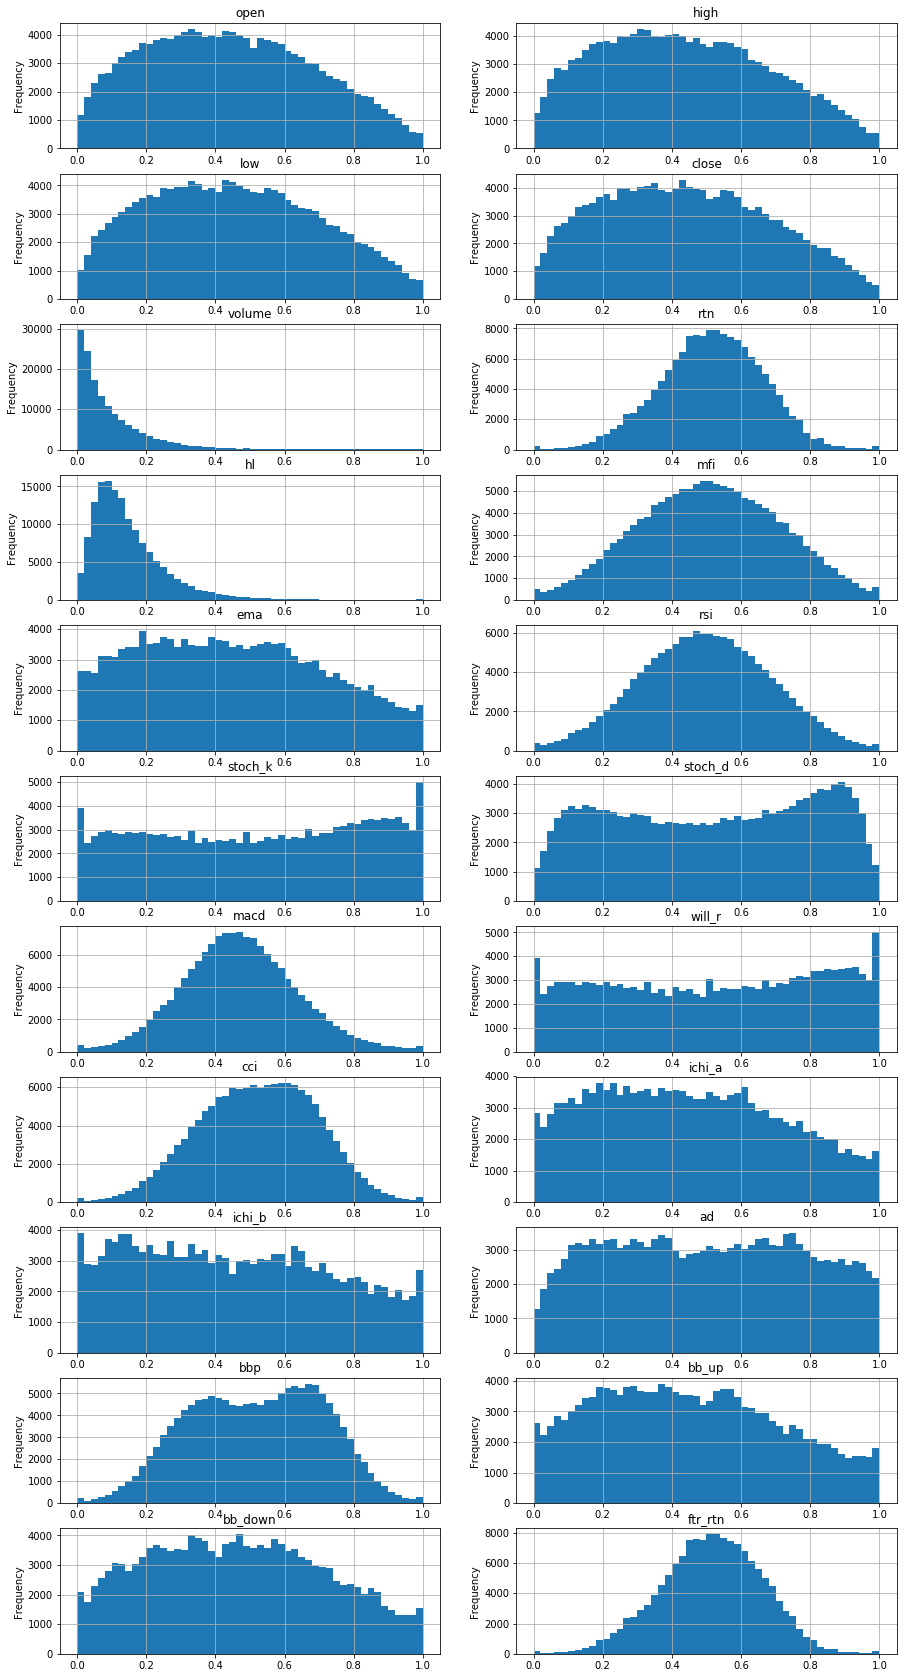

In [103]:
from sklearn import preprocessing
from matplotlib import pyplot as plt

fig, axs = plt.subplots(11,2, figsize=(15, 30))   
for i, ax in enumerate(axs.flatten()):
    nomaliser = preprocessing.MinMaxScaler(feature_range=(0,1))
    df_val = nomaliser.fit_transform(dfois[i])
    ax.hist(df_val.reshape(df_val.shape[0]*df_val.shape[1]), bins=50)
    ax.set_title(dfois_str[i])
    ax.set_ylabel('Frequency')
    ax.grid()

Now, let us analyse the correlation heatmap and histograms above.
- Firstly, open, high, low and close values are highly correlated to each other. This is expected because the values are within close proximity to each other. As the technical indicators are calculated using these values and intrinsicly retain its information, open, high, and low values can be removed from feature list.
- Most of the distributions above are either normal or uniform in shape, expect for hl and volume. This suggests that there will be a large number of outliers in those two features. In addition, observing the correlation matrix, they also appear to have low correlation to ftr_rtn which is what we will be predicting. Therefore, it justifies to leave hl and volume out from the feature list.
- Similarly, based on the correlation matrix heatmap, some values appear to not have much correlation to ftr_rtn. They are: mfi, stoch_d, macd, cci, and ad. To keep the prediction model simple, these features can also be regarded as not useful.
- Finally, it also appears that stoch_k is highly correlated to william_r. The stochastic oscillators can therefore be completely removed from the feature list.

Based on the discussion above, the final feature list would be: close, rtn, ema, rsi, will_r, ichi_a, ichi_b, bbp, bb_up, bb_down.

Our strategy is to predict the UP and DOWN movement of a stock together with its probability. Therefore, we need to create a target dataframe that categorises into 1 and 0: 1 for UP and 0 for DOWN. 

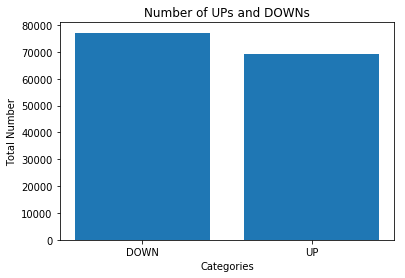

In [104]:
# Create target dataframe
df_target = (df_ftr_rtn > 0).astype(int)

# Look at the proportion
values, counts = np.unique(df_target.values.reshape(df_target.shape[0]*df_target.shape[1]), return_counts=True)
plt.bar(values,counts,tick_label=['DOWN','UP'])
plt.title('Number of UPs and DOWNs')
plt.ylabel('Total Number')
plt.xlabel('Categories')
plt.show()

Based on the analysis above, it appears that there are more DOWNs than UPs. Therefore, some balancing is required before sending the data for machine learning.

In [105]:
# list all the dataframes of interest
dfois = [df_close, df_rtn, df_ema, df_rsi, df_will_r, df_ichi_a, df_ichi_b, df_bbp, df_bb_up, df_bb_down, df_target]

## 3. Forecasting

In [106]:
from sklearn import preprocessing

# list of normalisers corresponding to each dataframe
nomalisers = []

for i, df in enumerate(dfois[:-1]):
    nomalisers.append(preprocessing.MinMaxScaler(feature_range=(0,1)))
    columns = df.columns
    index = df.index
    df = nomalisers[i].fit_transform(df)
    dfois[i] = pd.DataFrame(df, columns=columns, index=index)

In [107]:
# split all dataframes into test, training, and evaluation sets
#
# datetime range: 2015-01-02 to 2018-06-29
# train: 2015-02-01 to 2017-06-30
# validation: 2017-07-01 to 2017-12-31
# test: 2018-01-01 to 2018-06-29

# train set
dfois_train = []
for df in dfois:
    dfois_train.append(df.iloc[df.index < '2017-07-01'])

# test set
dfois_test = []
for df in dfois:
    dfois_test.append(df.iloc[df.index >= '2018-01-01'])

# evaluation set
dfois_eval = []
for df in dfois:
    dfois_eval.append(df.iloc[(df.index >= '2017-07-01') & (df.index < '2018-01-01')])

In [108]:
# list of scalers corresponding to each dataframe
scalers = []

# standardise the data by fitting the train set
for i, _ in enumerate(dfois[:-1]):
    # Create the Scaler object
    scalers.append(preprocessing.StandardScaler())
    
    # Columns and indexes
    columns = dfois_train[i].columns
    index_train = dfois_train[i].index
    index_test = dfois_test[i].index
    index_eval = dfois_eval[i].index
    
    # Fit scale
    flat_arr = dfois_train[i].values.reshape(dfois_train[i].shape[0]*dfois_train[i].shape[1],1)
    # scaler.fit(dfois_train[i].values)
    scalers[i].fit(np.tile(flat_arr, dfois_train[i].shape[1]))
    
    # Trasform
    train_data = scalers[i].transform(dfois_train[i])
    eval_data = scalers[i].transform(dfois_eval[i])
    test_data = scalers[i].transform(dfois_test[i])
    
    # Replace list
    dfois_train[i] = pd.DataFrame(train_data, columns=columns, index=index_train)
    dfois_eval[i] = pd.DataFrame(eval_data, columns=columns, index=index_eval)
    dfois_test[i] = pd.DataFrame(test_data, columns=columns, index=index_test)

In [109]:
# arrange sequential_data
from sklearn import preprocessing
import pandas as pd
from collections import deque
import random

# look at the past 60 days
SEQ_LEN = 60

def sequence_data(df_list, shuffle=True):
    # this is a list that will CONTAIN the sequences
    sequential_data = []

    for ticker in df_close.columns:
        # initialise dataframe
        df_ticker = pd.DataFrame()

        # concatenate the dataframes
        for df in df_list:
            df_ticker = pd.concat([df_ticker, df[ticker]], axis=1)

        prev_days = deque(maxlen=SEQ_LEN)
        for i in df_ticker.values:  # iterate over the values
            prev_days.append([n for n in i[:-1]])  # store all but the target
            if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
                sequential_data.append([np.array(prev_days), i[-1]])  # append those bad boys!
                
        # shuffle
        if shuffle == True:
            random.shuffle(sequential_data)

    return sequential_data

In [110]:
# scale all data
sequential_data_train = sequence_data(dfois_train)
sequential_data_eval = sequence_data(dfois_eval)
sequential_data_test = sequence_data(dfois_test, shuffle=False) # do not shuffle just this one

# print the length
print('Training data length: {}'.format(len(sequential_data_train)))
print('Validation data length: {}'.format(len(sequential_data_eval)))
print('Testing data length: {}'.format(len(sequential_data_test)))

Training data length: 93840
Validation data length: 11730
Testing data length: 10880


In [111]:
# balance train and evaluation data
def balance_data(sequential_data):
    buys = []  # list that will store our buy sequences and targets
    sells = []  # list that will store our sell sequences and targets

    for seq, target in sequential_data:  # iterate over the sequential data
        if target == 0:  # if it's a "not buy"
            sells.append([seq, target])  # append to sells list
        elif target == 1:  # otherwise if the target is a 1...
            buys.append([seq, target])  # it's a buy!
    
    random.shuffle(buys)  # shuffle the buys
    random.shuffle(sells)  # shuffle the sells!

    lower = min(len(buys), len(sells))  # what's the shorter length?

    buys = buys[:lower]  # make sure both lists are only up to the shortest length.
    sells = sells[:lower]  # make sure both lists are only up to the shortest length.

    sequential_data = buys+sells  # add them together
    random.shuffle(sequential_data)  # another shuffle, so the model doesn't get confused with all 1 class then the other.
    
    return sequential_data

# separate train and target data
def separate_data(sequential_data):
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), y  # return X and y...and make X a numpy array!

In [112]:
# perform balancing by calling the function
train_x, train_y = separate_data(balance_data(sequential_data_train))
validation_x, validation_y = separate_data(balance_data(sequential_data_eval))

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint

# batch size and epochs
BATCH_SIZE = 64
EPOCHS = 10

# build LSTM prediction model
model = Sequential()

model.add(LSTM(128, input_shape=(train_x.shape[1:]), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

# Model summary
print(model.summary())

C:\Users\Arvind\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           71168     
_________________________________________________________________
dropout (Dropout)            (None, 60, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 128)           512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 128)           512       
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
__________

In [ ]:
# Train model
history = model.fit(train_x, train_y,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(validation_x, validation_y))

Train on 88212 samples, validate on 11680 samples
Epoch 1/10
41664/88212 [=============>................] - ETA: 10:17 - loss: 0.7258 - acc: 0.4976

# References

[1] Borovkova S, Tsiamas I. An ensemble of LSTM neural networks for high-frequency stock market classification. Journal of Forecasting. 2019;1–20. https://doi.org/10.1002/for.2585

[2] Hegazy O, Soliman OS, Salam MA. A Machine Learning Model for Stock Market Prediction. International Journal of Computer Science and Telecommunications. 2013; 17-23. https://www.ijcst.org/Volume4/Issue12/p4_4_12.pdf

[3] Vargas MR, dos-Anjos CEM, Bichara GLG ; Evsukoff AG. Deep Learning for Stock Market Prediction Using Technical Indicators and Financial News Articles. 2018; https://doi.org/10.1109/IJCNN.2018.8489208

[4] 